In [2]:
import jax 
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import matplotlib.pyplot as plt

Optimization starts with approximating a function

To help motivate us, let's consider the following function: 

$$ \begin{align}\text{objective function}:& \quad
\underset{x}{\text{min}}  \\\\  
\text{update rule}:& \quad x_{t-1} = x_t - \alpha _t H(x_t)^{-1}\nabla f(x_t)\end{align} $$

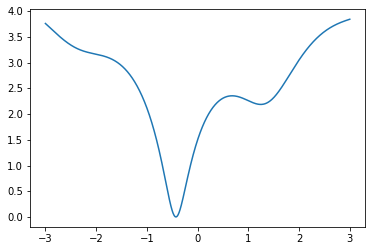

In [40]:
def f(x):
    return jnp.log(x**2 + 1.0 + jnp.sin(x*3)) + 1.5

xs = jnp.linspace(-3., 3., 1000)
ys = f(xs)

plt.plot(xs, ys)
plt.show()

Let's approximate this function

In [41]:
def make_approx2(x0, f):

    def f_approx(x):
        return f(x0) + jax.grad(f)(x0)*(x-x0) + (1/2)*jax.grad(jax.grad(f))(x0)*(x-x0)**2
    
    return f_approx 

def make_approx1(x0, f):

    def f_approx(x):
        return f(x0) + jax.jacobian(f)(x0)*(x-x0) 
    
    return f_approx 

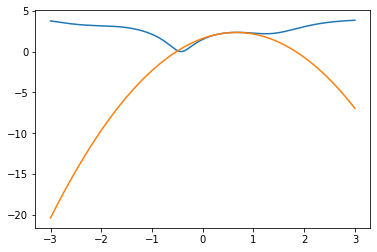

In [42]:
x0 = .5 

f_approx = make_approx2(x0, f)
xs = jnp.linspace(-3., 3., 1000)
ys = f(xs)
ys_approx = jax.vmap(f_approx)(xs)

plt.plot(xs, ys)
plt.plot(xs, ys_approx)
plt.show()

To mimize a scalar valued function, we often want to find (a/the) root of a related vector valued function

$$\begin{align} \underset{x}{\text{min}} \ f(x) \iff 
\text{solve:} \ \nabla f(x)= 0\end{align}$$

To solve a systems of equations (here n x n), we can apply Newton's method which essentially proceeds as follows:
at each iteration, we first linearly approximate the function 

$$\begin{align} \nabla f (x) \approx   \nabla f (x_0) + \nabla ^2 f(x_0)(x-x_0)\end{align}$$
and then we find the root of linear approximation to get the next value
$$\begin{align} 0 &=  \nabla f (x_0) + \nabla  ^2 f(x_0)(x-x_0)\\\\
x &= x_0 - \nabla  ^2 f(x_0)^{-1}\nabla f(x_0)\end{align}$$

In [55]:
def newton_method(f, x, iters=1000):

    def update(carry, t):
        x = carry 
        x_new = x - jnp.dot((jax.grad(f)(x))**(-1), f(x))
        return x_new, x_new 
    
    ans, hist  = jax.lax.scan(update, x, xs=None, length=iters)
    return ans, hist

def objective(x):
    return jnp.log(x**2 + 1.0 + jnp.sin(x*3)) + 1.5
        
ans, hist = newton_method(jax.grad(objective), 1.)
print(ans)

0.68057626


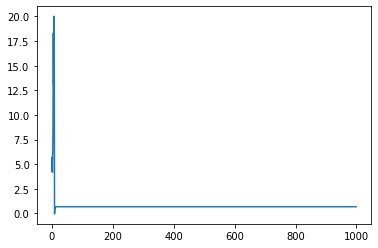

In [59]:
plt.plot(hist)
plt.show()